Mean reward=0.07868294019630673
optimal_action=2


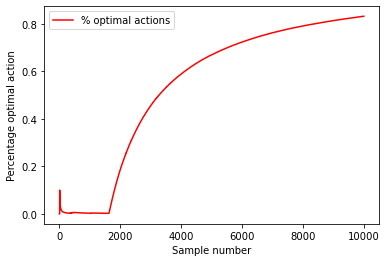

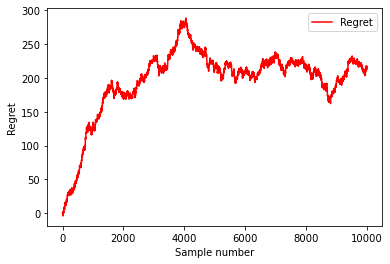

In [ ]:
#!/usr/bin/env python3

'''
Created on 14 Jan 2022

@author: ucacsjj
'''

import matplotlib.pyplot as plt
import numpy as np

from bandits.bandit import Bandit
from bandits.bandit import BanditEnvironment
from bandits.epsilon_greedy_agent import EpsilonGreedyAgent
from bandits.performance_measures import compute_percentage_of_optimal_actions_selected
from bandits.performance_measures import compute_regret

if __name__ == '__main__':
       # Create bandit
    environment = BanditEnvironment(4)
    
    # Add some bandits
    environment.set_bandit(0, Bandit(0, 1))    
    environment.set_bandit(1, Bandit(0, 1))    
    environment.set_bandit(2, Bandit(0.1, 1))
    environment.set_bandit(3, Bandit(0, 1))
    
    number_of_steps = 10000
    
    # Q5b:
    # Change values to see what happens
    epsilon = 0.01
    
    agent = EpsilonGreedyAgent(environment, epsilon)
    
    # Step-by-step store of rewards
    reward_history = np.zeros(number_of_steps)
    action_history = np.zeros(number_of_steps)
    
    # Step through the agent and let it do its business
    for p in range(0, number_of_steps):
        action_history[p], reward_history[p] = agent.step()
        
    print(f'Mean reward={np.mean(reward_history)}')
    
    # Plot percentage correct action curves
    percentage_correct_actions = compute_percentage_of_optimal_actions_selected(environment, action_history)
    plt.ion()
    plt.plot(percentage_correct_actions, color = 'red', label = '% optimal actions')
    plt.legend()
    plt.xlabel('Sample number')
    plt.ylabel('Percentage optimal action')

    # Plot the regret curves
    regret = compute_regret(environment, reward_history)
    plt.figure()
    plt.plot(regret, color = 'red', label = 'Regret')
    plt.legend()
    plt.xlabel('Sample number')
    plt.ylabel('Regret')
    
    plt.show()
    plt.pause(0.001)
    input()
    